# Animations

In [21]:
import glob
import datetime
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
#FName = '/ocean/yingkai/GEOTRACES/Simulations/RUN01_1m_20020101_20051231_ptrc_T.nc'
FName = '_data/RUN01_1m_20020101_20051231_ptrc_T.nc'
L=0; lev1 = np.arange(30, 85, 2.5)

In [46]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(60)]

In [47]:
ptrc_obj = nc.Dataset(FName)
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [48]:
def init():
    plt.cla(); ax1=fig.gca()
    ax1.plot(1, 1,linewidth=0)
def movie_Ba(time_step):
    print('Frame '+str(time_step))
    plt.cla()
    ax=fig.gca()
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
    proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    
    CBar=proj.colorbar(CS, location='bottom', size='2%', pad='3%')
    CBar.set_label('nM', fontsize=10)
    CBar.ax.tick_params(axis='x', length=16)
    ax.set_title('Time: '+date_list[time_step].strftime("%Y-%m-%d"), fontsize=15)

Frame 0


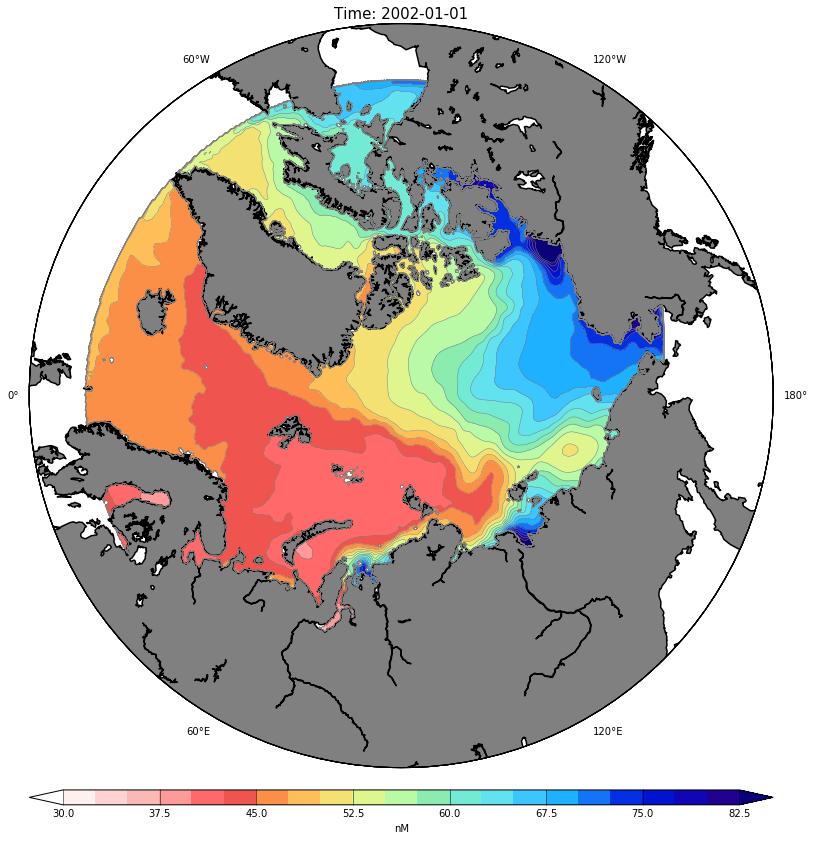

In [49]:
fig=plt.figure(figsize=(14, 14))
movie_Ba(0)

Frame 0
Frame 1
Frame 2
Frame 3
Frame 4


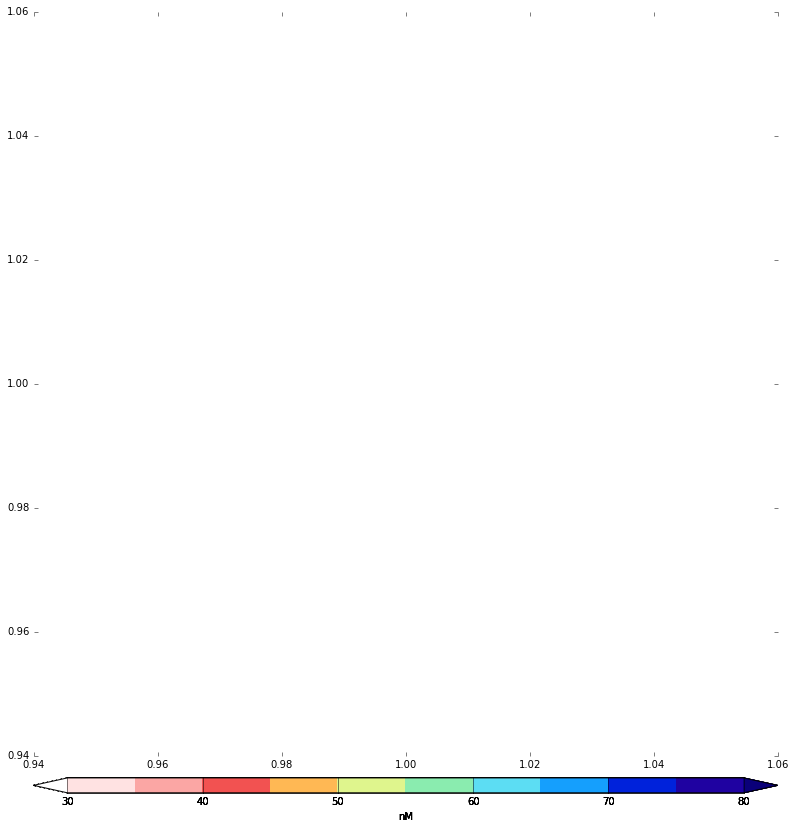

In [44]:
fig=plt.figure(figsize=(14, 14))
ani_obj=animation.FuncAnimation(fig, movie_Ba, range(5), init_func=init, interval=1250, blit=False)
#writer_obj=animation.FFMpegFileWriter()
ani_obj.save('Barium_2002_2005_1m.mov', metadata={'author':'GEOTRACES'})

In [7]:
date_list[0].

datetime.datetime(2002, 1, 1, 0, 0)